## Question 9 sect. 2.4
#### Auto dataset

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##### Pre Question Work

In [2]:
# read in dataset
autoDF = pd.read_csv("Auto.csv")
autoDF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
rows = len(autoDF.axes[0])
cols = len(autoDF.axes[1])
print (rows, cols)

397 9


In [4]:
# check for missing values
# axis = 1 for cols
autoDF.isnull().any(axis = 1).sum() == 0
# no null values
# turns out, after receiving errors below when calculating the statistics, 
# there are rows in the quant rows that are no numerical but were not caught
# by the .isnull function
# turns out, after googling the df, some rows have "?"
autoDF = autoDF.drop(autoDF[autoDF.values == '?'].index)
rows = len(autoDF.axes[0])
cols = len(autoDF.axes[1])
print(rows, cols)

392 9


##### a) which predictors are quantitative, which are are qualitative

In [5]:
autoDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

Quantitative Variables: mpg, cylinders, displacement, horsepower, weight, acceleration, year

Qualitative Variables: origin, name

##### b) what is the range of each quantitative predictor

In [6]:
quantDF = autoDF.iloc[:, 0:7].astype(float)
# quantDF.head()
pd.DataFrame({"range" : quantDF.max() - quantDF.min()})

,range
mpg,37.6
cylinders,5.0
displacement,387.0
horsepower,184.0
weight,3527.0
acceleration,16.8
year,12.0


##### c) mean and standard deviation of each quantitative predictor

In [7]:
pd.DataFrame({"mean" : quantDF.mean(), 
             "std dev" : quantDF.std()})

,mean,std dev
mpg,23.445918,7.805007
cylinders,5.471939,1.705783
displacement,194.411990,104.644004
horsepower,104.469388,38.491160
weight,2977.584184,849.402560
acceleration,15.541327,2.758864
year,75.979592,3.683737


##### d.1) remove the 10th - 85th observations

In [8]:
new_quantDF = quantDF.drop(quantDF.index[11:86])
rows = len(new_quantDF.axes[0])
cols = len(new_quantDF.axes[1])
print(rows, cols)

317 7


##### d.2) range, mean, standard deviation of new df

In [9]:
pd.DataFrame({"range" : new_quantDF.max() - new_quantDF.min(),
             "mean" : new_quantDF.mean(), 
             "std dev" : new_quantDF.std()})

,range,mean,std dev
mpg,35.6,24.377918,7.868594
cylinders,5.0,5.381703,1.658135
displacement,387.0,188.129338,100.557303
horsepower,184.0,101.066246,36.106716
weight,3348.0,2938.511041,811.352128
acceleration,16.3,15.699369,2.728541
year,12.0,77.113565,3.144169


##### e) investigate predictors graphically ie. scatterplots, etc

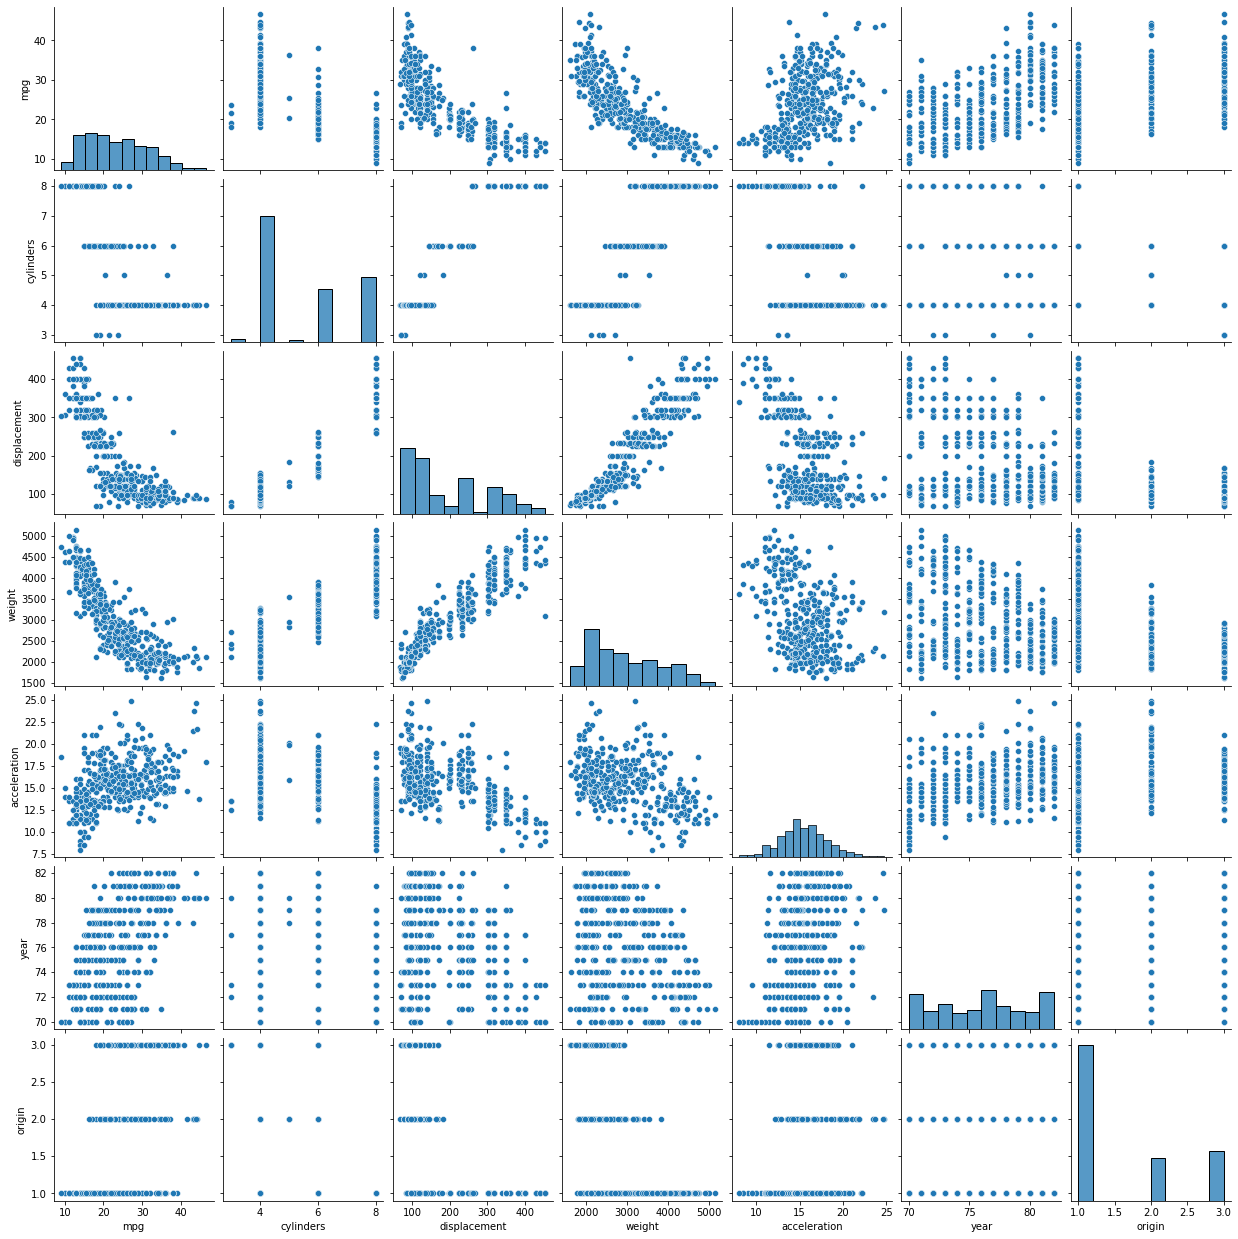

In [15]:
sns.pairplot(autoDF);

First and foremost, origin is a factor variable with the corresponding numbers being: 
1 = USA
2 = Europe
3 = Japan

The pairplot above displays all of the relationships between the variables in the Auto dataset. From a quick glance, it's clear that there are some strong linear relationships. 

Looking at displacement, 3 variables stick out the most:

-Origin: Cars made in Japan have a higher displacement compared to both the US and Eurpoe.

-Weight: Weight has a strong positive linear relation. As displacement increases, the weight of the car increases.

-MPG: There seems to be a strong exponential decay relation. As displacement increases, the MPG of a car decreases dramatically.

Acceleration has the least interpretable plots of all of the variables ; weak relations.

As weight increases, the number of cylinders a car has increases.

##### f) are any of the plots useful in predicting mpg? Justify.

Right off the back, there are 3 variables that stand out to have a strong relation in potentially predicting the mpg of a car in this auto df:

-Year: There is a positive linear relation. As the year increases, the mpg of a car increases.

-Displacement: There is a negative linear relation. As the mpg increases, the displacement decreases.

-Weight: Like displacement, there is a negative linear relation. As mpg increases, weight decreases. This means that cars that weigh less tend to have better/higher gas consumption.

It also looks like cars with origin = 1 = USA tend to have high mpg than the other 2 countries.